221
388


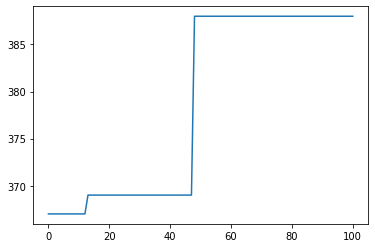

In [1]:

import math
import random
import matplotlib.pyplot as plt
import numpy as np


def init_x(n, d,V_max, V_min):
    '''初始化种群每个粒子的位置和速度

    Arguments:
        n -- 粒子总数量
        d -- 粒子种基因个数(维度)
        V_max -- 速度最大值
        V_min -- 速度最小值

    Returns:
        population -- 种群位置
        vi -- 种群速度
    ''' 
    population =np.zeros((n,d))
    for i in range(n):
        for j in range(d):
            population[i,j]=np.random.randint(0, 2)
    vi=np.zeros((n,d), dtype = int)
    for i in range (n):
        for j in range (d):
            vi[i,j] = random.random() * (V_max - V_min) + V_min	 
    
    return population,vi

def fitness(p, n, d, w, w_max, v, afa):
    '''适应度计算

    Arguments:
        p -- 粒子群
        n -- 群体粒子个数
        d -- 粒子维数
        w -- 物品的重量列表
        w_max -- 背包最大容量
        v -- 物品的价值列表
        afa -- 惩罚系数

    Returns:
         fitvalue -- pbest每一个粒子的适应度列表
         fitweight -- 每一个粒子的重量
    '''    
    fitvalue =np.zeros(n, dtype = int)
    fitweight =np.zeros(n, dtype = int)
    for i in range (n):
        for j in range(d):
            if p[i][j] == 1:
                fitweight[i] += w[j]
                fitvalue[i] += v[j]
        if fitweight[i] > w_max:
            fitvalue[i] = 0
            
    return fitvalue, fitweight

def update_pbest(p, fitvalue, pbest, px, m):
    '''更新个体最优

    Arguments:
        p -- 当前种群
        fitvalue -- 当前每个粒子的适应度
        pbest -- 更新前的个体最优
        px -- 更新前的个体最优解
        m -- 粒子数量

    Returns:
        更新后的个体最优值、个体最优解
    '''
    pb = pbest
    for i in range (m):
        if fitvalue[i] > pb[i]:
            pb[i] = fitvalue[i]
            px[i] = p[i]
    return pb, px

def update_gbest (p, pbest, gbest, g, m):
    '''更新全局最优解

    Arguments:
        p -- 粒子群
        pbest -- 个体适应度(个体最优)
        gbest -- 全局最优
        g -- 全局最优解
        m -- 粒子数量

    Returns:
         gb -- 全局最优
         g -- 对应的全局最优解
    '''
    gb=gbest
    for i in range (m):
        if pbest[i] > gb:
            gb = pbest[i]
            g = p[i]
    return gb, g

def update_v(v, x, m, n, pbest, g, c1, c2, vmax, vmin):
    '''更新速度

    Arguments:
        v -- 更新前的速度
        x -- 更新前的位置
        m -- 粒子数量
        n -- 粒子维度
        pbest -- 个体最优解(二维列表)
        g -- 全局最优解(一维列表)
        c1 -- 个体学习率
        c2 -- 社会学习率
        vmax -- 最大速度
        vmin -- 最小速度

    Returns:
        更新后的速度二维列表
    '''
    for i in range (m):
        for j in range (n):
            v[i][j]=v[i][j]+c1*random.random()*(pbest[i][j]-x[i][j]) + c2*random.random()*(g[j]-x[i][j])
            if v[i][j] < vmin:
                v[i][j] = vmin
            if v[i][j] > vmax:
                v[i][j] = vmax
    return v


def update_x(x, v, m, n):
    '''更新位置(离散二进制PSO)

    Arguments:
        x -- 更新前的x
        v -- 更新后的v
        m -- 粒子数量
        n -- 粒子维度

    Returns:
        更新后的x
    '''
    for i in range (m):
        for j in range(n):
            a = random.random()
            x[i][j] = 1/(1+math.exp(-v[i][j]))
            x[i][j] = 1 if x[i][j] > a else 0
    return x


# main()
if __name__ == '__main__':

    Weight = [95,75,23,73,50,22,6,57,89,98]  # 物品重量
    Value = [89,59,19,43,100,72,44,16,7,64]  # 物品价值
    N = 10  # 群体粒子个数
    D = len(Weight)  # 粒子维数
    T = 100  # 最大迭代次数
    c1 = 1.5  # 个体学习率
    c2 = 1.5  # 社会学习率
    W_max = 0.8  # 惯性权重最大值
    W_min = 0.4  # 惯性权重最小值
    V_max = 10  # 速度最大值
    V_min = -10  # 速度最小值
    Weight_max = 300  # 背包容量
    afa = 10  # 惩罚系数
    item = []  # 用于记录每一次迭代的全局最优值
    itemg = []  # 用于记录每一次迭代的全局最优解
    x , v= init_x(N, D,V_max,V_min)  # 初始化x
    fv , fw = fitness(x, N, D, Weight, Weight_max, Value, afa)  # 计算第一次迭代的适应度
    pb, px = fv, x  # 由于是第一次迭代，个体最优为当前值
    gb, g = update_gbest(px, pb, 0, [], N)  # 同理，寻找第一代的全局最优 
    item.append(gb)# item列表记录每一次迭代的全局最优
    itemg.append(g)
    for j in range(T):
        fv, fw = fitness(x, N, D, Weight, Weight_max, Value, afa)
        pb, px = update_pbest(x, fv, pb, px, N)
        gb, g = update_gbest(px, pb, gb, g, N)
        x=px
        v = update_v(v, x, N, D, px, g, c1, c2, V_max, V_min)
        x = update_x(x, v, N, D)
        
        item.append(gb)
        itemg.append(g)

    Wei = sum(Weight[i] for i in range(10) if g[i]==1.)
    print(Wei)        
    print(gb)
    plt.plot(item)
    plt.show()
   

new_v = w*v + c1 * rand() * (pbest - position) + c2 * rand() * (gbest-position)
